Importing dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Reading the data

In [2]:
calories_burnt_data = pd.read_csv("/content/calories.csv")
exercise_data = pd.read_csv("/content/exercise.csv")

In [3]:
calories_burnt_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining both datasets on basis of user id

In [5]:
calories_data = pd.merge(exercise_data, calories_burnt_data, on = "User_ID")

In [6]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Understanding and cleaning

Checking dimensions of data

In [7]:
calories_data.shape

(15000, 9)

Getting some nformation about the data

In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking for missing values

In [9]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Calculating statistical measure for quantitive data

In [10]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
## No. of data points of different genders
calories_data['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


# Univariate Data Analysis

In [12]:
sns.set()

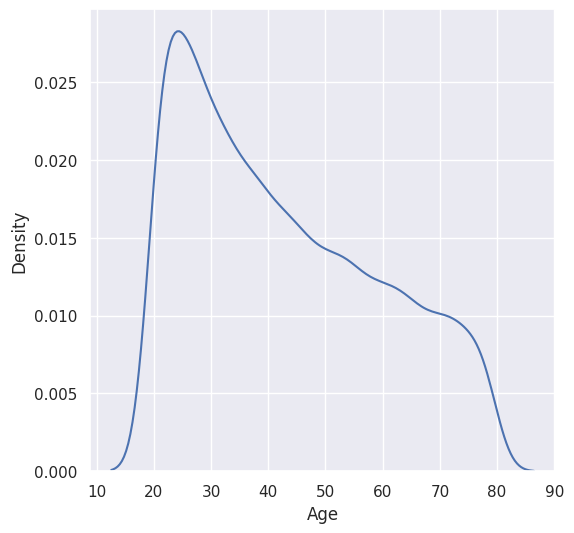

In [13]:
## KDE plot for age
plt.figure(figsize=(6,6))
sns.kdeplot(calories_data['Age'])
plt.show()

<Axes: xlabel='Height', ylabel='Density'>

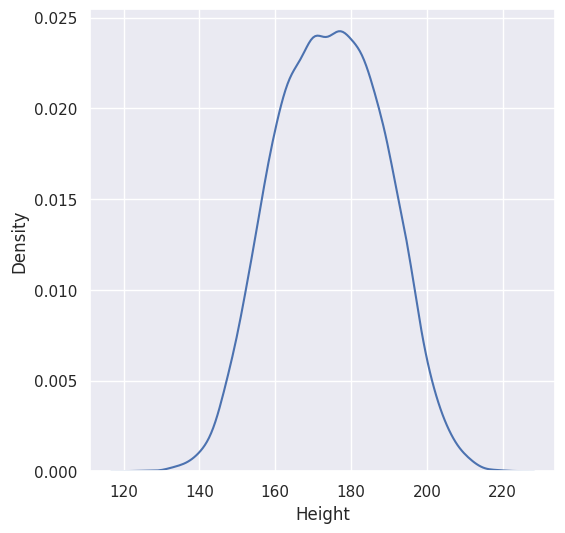

In [14]:
## KDE plot for Height
plt.figure(figsize=(6,6))
sns.kdeplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

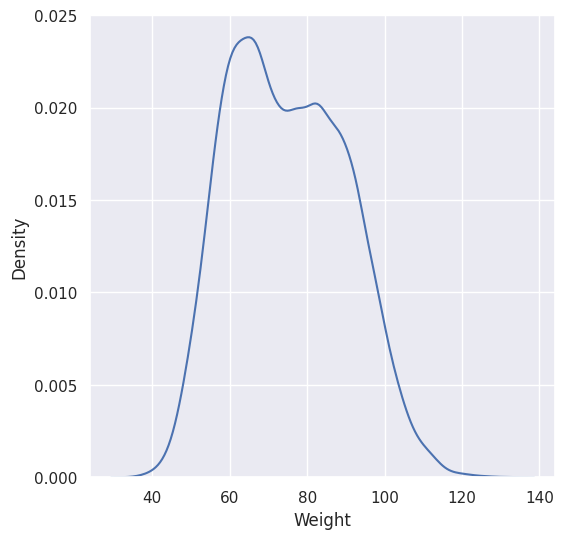

In [15]:
## KDE plot for weight
plt.figure(figsize=(6,6))
sns.kdeplot(calories_data["Weight"])

<Axes: xlabel='Duration', ylabel='Density'>

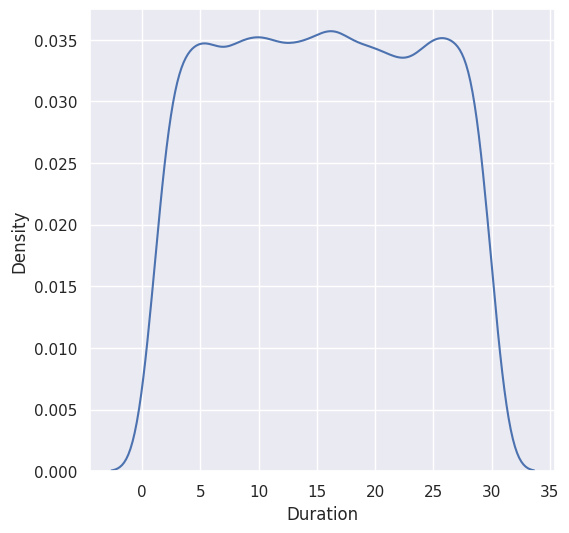

In [16]:
## KDE plot for Duration
plt.figure(figsize=(6,6))
sns.kdeplot(calories_data['Duration'])

<Axes: xlabel='Body_Temp', ylabel='Density'>

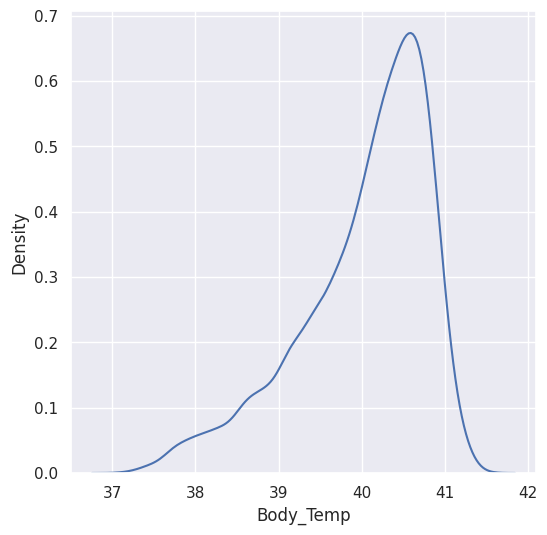

In [17]:
## KDE Plot for Body_Temp
plt.figure(figsize=(6,6))
sns.kdeplot(calories_data["Body_Temp"])

<Axes: xlabel='Gender', ylabel='count'>

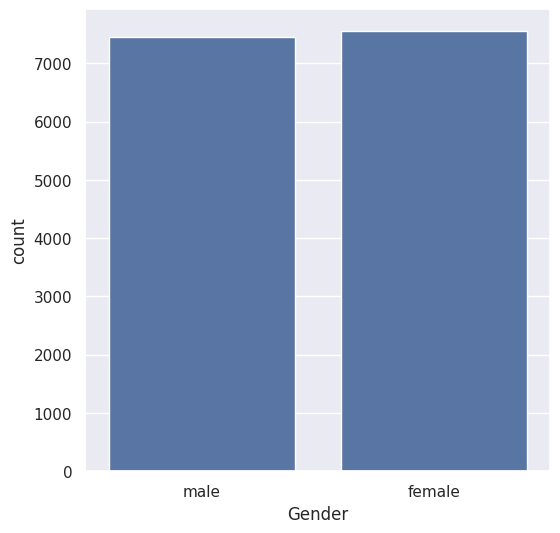

In [18]:
##Histogram for Gender
plt.figure(figsize=(6,6))
sns.countplot(x= 'Gender', data=calories_data)

# Bivariate Data Analysis

<Axes: xlabel='Gender', ylabel='Calories'>

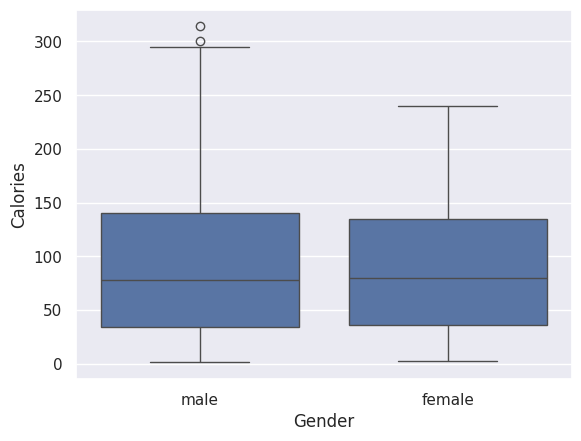

In [19]:
## boxplot of calories with gender
sns.boxplot(x="Gender",y="Calories", data=calories_data)

<Axes: xlabel='Age', ylabel='Calories'>

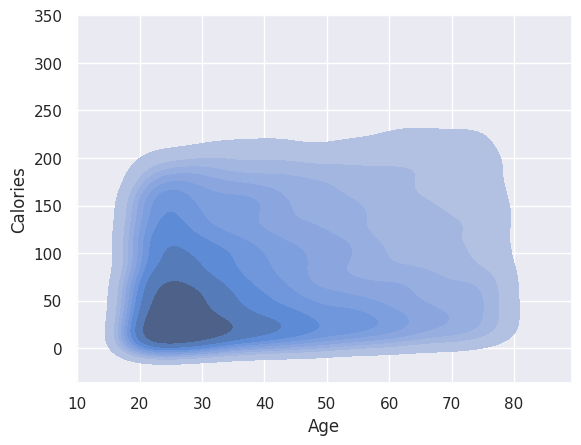

In [20]:
## kde plot for calories vs age
sns.kdeplot(x="Age", y="Calories", data=calories_data, fill=True)

<Axes: xlabel='Height', ylabel='Calories'>

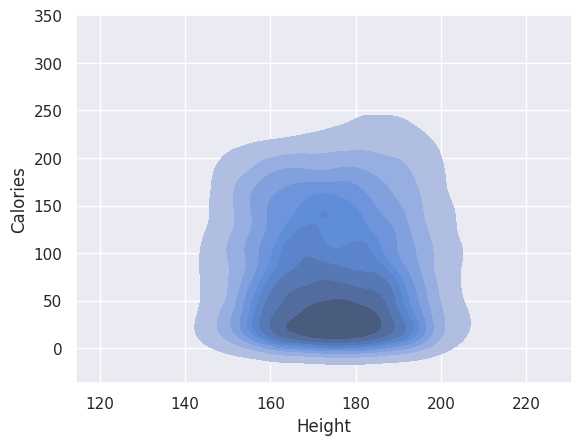

In [21]:
## kde plot for calories vs 	Height
sns.kdeplot(x="Height", y="Calories", data=calories_data, fill=True)

<Axes: xlabel='Weight', ylabel='Calories'>

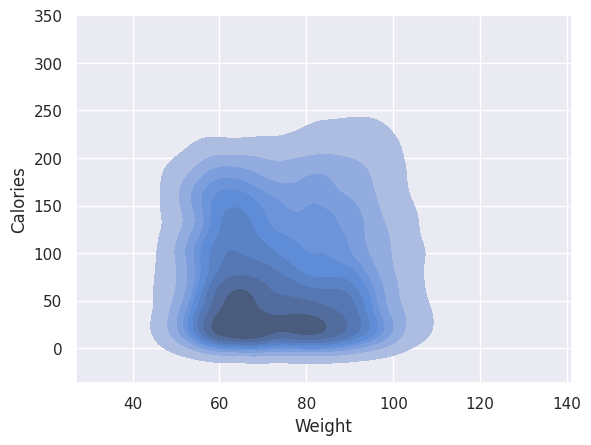

In [22]:
## kde plot for calories vs weight
sns.kdeplot(x="Weight", y="Calories", data=calories_data, fill=True)

<Axes: xlabel='Duration', ylabel='Calories'>

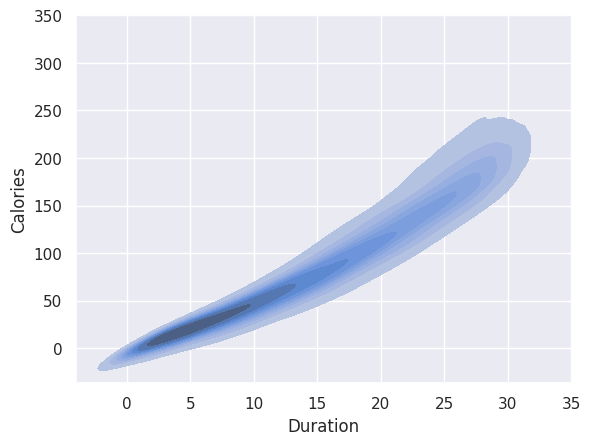

In [23]:
## kde plot for calories vs duration
sns.kdeplot(x="Duration", y="Calories", data=calories_data, fill=True)

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

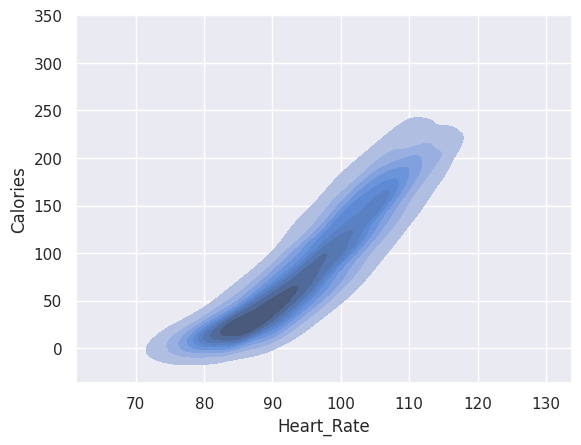

In [24]:
## kde plot for calories vs duration
sns.kdeplot(x="Heart_Rate", y="Calories", data=calories_data, fill=True)

<Axes: xlabel='Body_Temp', ylabel='Calories'>

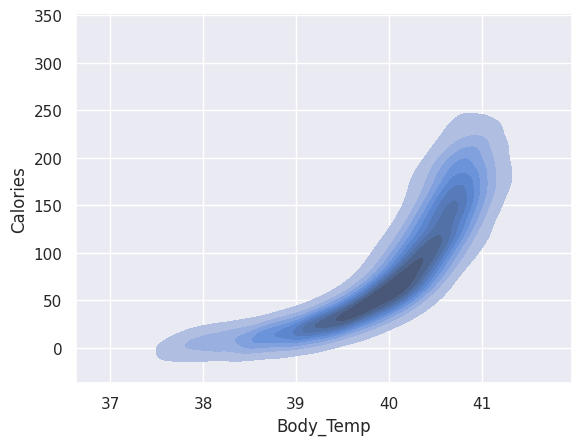

In [25]:
## kde plot for calories vs duration
sns.kdeplot(x="Body_Temp", y="Calories", data=calories_data, fill=True)

# Multivariate Analysis

<Axes: >

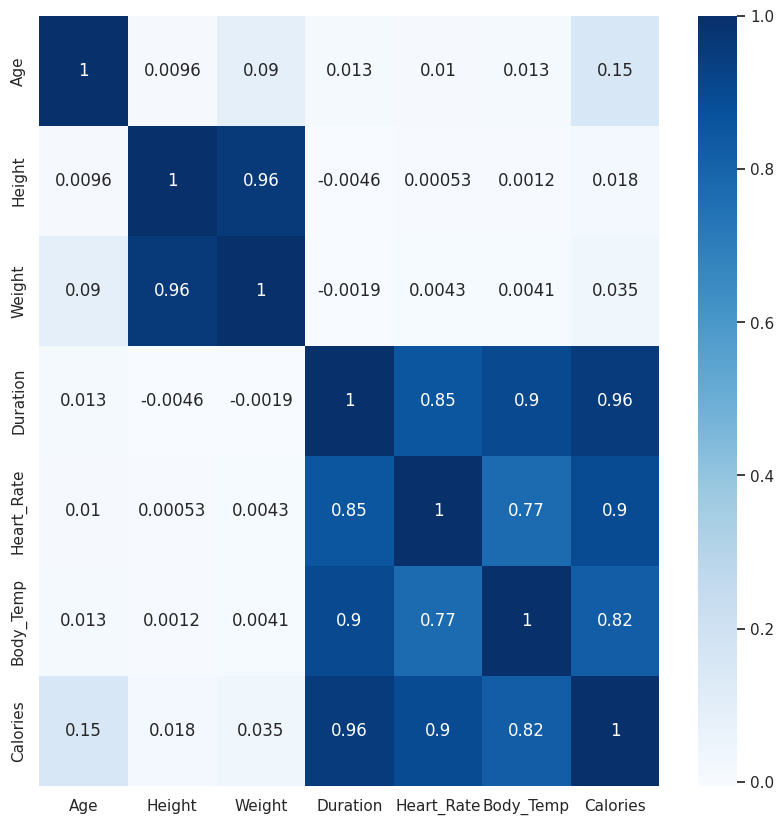

In [26]:
## plotiing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(calories_data.drop(columns=['User_ID', 'Gender']).corr(), cmap='Blues', annot=True)

In [27]:

X_const = add_constant(calories_data.drop(columns=['User_ID', 'Gender', 'Calories']) )
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

      Feature           VIF
0       const  14433.685749
1         Age      1.087827
2      Height     13.259685
3      Weight     13.367861
4    Duration      8.059124
5  Heart_Rate      3.669088
6   Body_Temp      5.427413


# Label Encoding

In [28]:
encode = LabelEncoder()

In [29]:
## Encoding categorical variable gender
calories_data['Gender'] = encode.fit_transform(calories_data['Gender'])

In [30]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# Splitting Features and Targets

In [31]:
X = calories_data.drop(columns=['User_ID','Calories'])
Y = calories_data['Calories']

In [32]:
## Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

## Model Building

XG Boost Regressor model

In [33]:
xgb = XGBRegressor()

In [34]:
## training our model
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
## prediction for training data prediction
train_data_prediction = xgb.predict(X_train)

## Prediction for test data
test_data_prediction = xgb.predict(X_test)

Evaluation for XG boost Regressor model

In [36]:
## for training data
print("R2 Score for training data =", r2_score(Y_train, train_data_prediction))
print("Root Mean Squared Error for training data =", root_mean_squared_error(Y_train, train_data_prediction))
print("Mean Absolute Error for training data =", mean_absolute_error(Y_train, train_data_prediction))

R2 Score for training data = 0.9995691477017405
Root Mean Squared Error for training data = 1.2952502203949643
Mean Absolute Error for training data = 0.9322033420062313


In [37]:
## for testing data
print("R2 Score for testing data =", r2_score(Y_test, test_data_prediction))
print("Root Mean Squared Error for testing data =", root_mean_squared_error(Y_test, test_data_prediction))
print("Mean Absolute Error for testing data =", mean_absolute_error(Y_test, test_data_prediction))

R2 Score for testing data = 0.998800624504713
Root Mean Squared Error for testing data = 2.1704170134933394
Mean Absolute Error for testing data = 1.4833678883314132


Ridge Regression model

In [38]:
## Standarization of the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
## Using cross validation to find the best value of aplha
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, Y_train)
best_alpha = ridge_cv.alpha_

In [40]:
best_alpha

np.float64(0.3511191734215131)

In [41]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_scaled, Y_train)

Ridge(alpha=np.float64(0.3511191734215131))

In [42]:
## training data prediction
train_data_prediction_ridge = ridge.predict(X_train_scaled)

## testing data prediction
test_data_prediction_ridge = ridge.predict(X_test_scaled)

Evaluation for Ridge regression model

In [43]:
## for training data
print("R2 Score for training data =", r2_score(Y_train, train_data_prediction_ridge))
print("Root Mean Squared Error for training data =", root_mean_squared_error(Y_train, train_data_prediction_ridge))
print("Mean Absolute Error for training data =", mean_absolute_error(Y_train, train_data_prediction_ridge))

R2 Score for training data = 0.9672762135647045
Root Mean Squared Error for training data = 11.288110256597763
Mean Absolute Error for training data = 8.332881375229604


In [44]:
## for testing data
print("R2 Score for testing data =", r2_score(Y_test, test_data_prediction_ridge))
print("Root Mean Squared Error for testing data =", root_mean_squared_error(Y_test, test_data_prediction_ridge))
print("Mean Absolute Error for testing data =", mean_absolute_error(Y_test, test_data_prediction_ridge))

R2 Score for testing data = 0.9668791401842446
Root Mean Squared Error for testing data = 11.405554410563997
Mean Absolute Error for testing data = 8.385057975989486


Decision Tree

In [45]:
## Hyperparameter tuning for decision tree model
param = {'max_depth':[2,4,8,10],
         'criterion':['squared_error', 'absolute_error']}

In [46]:
dt_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param, cv=5)
## training our model
dt_reg.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10]})

In [47]:
# Prediction for our training data
train_data_prediction_dt = dt_reg.predict(X_train)

# Prediction for our testing data
test_data_prediction_dt = dt_reg.predict(X_test)


Evaluation for decision tree model

In [48]:
## for training data
print("R2 Score for training data =", r2_score(Y_train, train_data_prediction_dt))
print("Root Mean Squared Error for training data =", root_mean_squared_error(Y_train, train_data_prediction_dt))
print("Mean Absolute Error for training data =", mean_absolute_error(Y_train, train_data_prediction_dt))

R2 Score for training data = 0.9957250849124494
Root Mean Squared Error for training data = 4.079934719709848
Mean Absolute Error for training data = 2.8016181024409246


In [49]:
## for testing data
print("R2 Score for testing data =", r2_score(Y_test, test_data_prediction_dt))
print("Root Mean Squared Error for testing data =", root_mean_squared_error(Y_test, test_data_prediction_dt))
print("Mean Absolute Error for testing data =", mean_absolute_error(Y_test, test_data_prediction_dt))

R2 Score for testing data = 0.9916559954600329
Root Mean Squared Error for testing data = 5.724701748425716
Mean Absolute Error for testing data = 3.9248403766365896


Random Forest model

In [50]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
## Training our model
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [51]:
## prediction for training data
train_data_prediction_rf = rf_reg.predict(X_train)

## prediction for testing data
test_data_prediction_rf = rf_reg.predict(X_test)

Evaluation for Random Forest model

In [52]:
## for training data
print("R2 Score for training data =", r2_score(Y_train, train_data_prediction_rf))
print("Root Mean Squared Error for training data =", root_mean_squared_error(Y_train, train_data_prediction_rf))
print("Mean Absolute Error for training data =", mean_absolute_error(Y_train, train_data_prediction_rf))

R2 Score for training data = 0.9996917216777116
Root Mean Squared Error for training data = 1.09562254753481
Mean Absolute Error for training data = 0.6835666666666668


In [53]:
## for testing data
print("R2 Score for testing data =", r2_score(Y_test, test_data_prediction_rf))
print("Root Mean Squared Error for testing data =", root_mean_squared_error(Y_test, test_data_prediction_rf))
print("Mean Absolute Error for testing data =", mean_absolute_error(Y_test, test_data_prediction_rf))

R2 Score for testing data = 0.9982532047713141
Root Mean Squared Error for testing data = 2.619308172017947
Mean Absolute Error for testing data = 1.6753700000000002


Predictive System

In [54]:
## Example entry: 1 30 170 70 30 80 37.0

input_str = input("Enter values for: Gender(1=male, 0=female) Age Height Weight Duration Heart_Rate Body_Temp, separated by spaces:\n")

input_list = [float(i) for i in input_str.strip().split()]
input_data = np.array([input_list])  # shape (1, n_features)

# Predict
prediction = xgb.predict(input_data)
print("Calories burned =", prediction[0])


Enter values for: Gender(1=male, 0=female) Age Height Weight Duration Heart_Rate Body_Temp, separated by spaces:
1 30 170 70 30 80 37.0
Calories burned = 114.85559
